In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize the pixel values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Class names for reference
class_names = ['airplane', 'car', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# CNN Architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.3445 - loss: 1.7754 - val_accuracy: 0.5092 - val_loss: 1.3509
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.5618 - loss: 1.2214 - val_accuracy: 0.6174 - val_loss: 1.1064
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6338 - loss: 1.0392 - val_accuracy: 0.6453 - val_loss: 1.0107
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6705 - loss: 0.9388 - val_accuracy: 0.6617 - val_loss: 0.9732
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7000 - loss: 0.8601 - val_accuracy: 0.6851 - val_loss: 0.9108
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7230 - loss: 0.7979 - val_accuracy: 0.6844 - val_loss: 0.9226
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7346 - loss: 0.7558 - val_accuracy: 0.6851 - val_loss: 0.9241
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7507 - loss: 0.712

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted class: cat


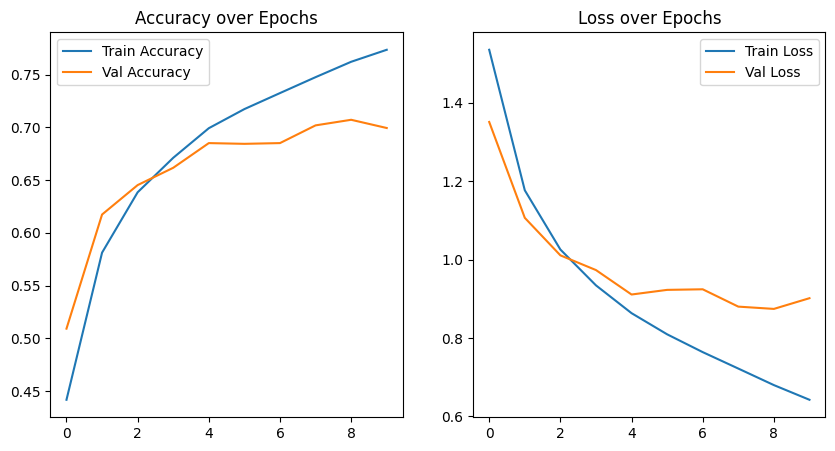

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image


# Load the image and resize to (32, 32)
img = image.load_img("/content/images (2).jpeg", target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Model expects batch dimension

# Predict
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

print(f"Predicted class: {class_names[predicted_class]}")



plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()
